## Data input, Tokenization and Pre-processing

In [9]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import itertools
from pathlib import Path
from matplotlib.font_manager import FontProperties

In [10]:
# A function that reads text from a file and returns a single chunk of data as output
def read_text(filename):
  # open the file
  file = open(filename, mode='rt', encoding='utf-8')
        
  # read all text
  text = file.read()
  file.close()
  return text

In [11]:
# Function to split the chunk of text into lines
def to_lines(text):
  sents = text.strip().split('\n')
  return sents

In [12]:
# create our own list of some special charachters which aligns to the devnagari scripts
import string 

# list of stopwords
dev_stop = ['.',',','?','!','।','॥']

# list of special charachters
dev_spec = ['@','#','$','%','&','^','*','(',')','-','_','+','=','[',']','{','}','|','/','>','<','\\',':',';','`','~','\'','\"','“','”','–','‘','’']

# list of english charachters
alphabet_string = string.ascii_lowercase
alphabet_list = list(alphabet_string)
alphabet_string1 = string.ascii_uppercase
alphabet_list1 = list(alphabet_string1)
dev_char = alphabet_list+alphabet_list1

# list of english numbers
dev_num = [str(num) for num in range(0,10)]

# list of hindi numbers
dev_num_hin = ['०','१','२','३','४','५','६','७','८','९']

dev_fin = dev_stop + dev_spec + dev_char + dev_num + dev_num_hin

print(dev_fin)

['.', ',', '?', '!', '।', '॥', '@', '#', '$', '%', '&', '^', '*', '(', ')', '-', '_', '+', '=', '[', ']', '{', '}', '|', '/', '>', '<', '\\', ':', ';', '`', '~', "'", '"', '“', '”', '–', '‘', '’', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '०', '१', '२', '३', '४', '५', '६', '७', '८', '९']


In [13]:
def clean_txt(text_list):
  fin_txt_list = []
  for lines in text_list:
    cf = ""
    for word in lines:
      if word in dev_fin:
        word = ""
      cf+=word
    fin_txt_list.append(cf)
  return fin_txt_list
    

In [14]:
def FreqCount(tokenlist):
  data_dic = dict()
  for word in tokenlist:
    if word in data_dic.keys():
      data_dic[word]=data_dic[word]+1
    else:
      data_dic[word] = 1
  return data_dic

In [15]:
def word_tokenize(sen):
  finlist = sen.split()
  return finlist

In [17]:
mr_path = "NLP_Project/data/train.mr"
mr_data = read_text(mr_path)
marathi_r = to_lines(mr_data)
marathi = clean_txt(marathi_r)
print(marathi[:50])

['याबाबत चिंचवड पोलीस ठाण्यात गुन्हा दाखल करण्यात आला आहे', 'आजही मोठ्या प्रमाणावर याचीच चर्चा होत असते', 'यावर्षी चालू खात्यातील तूट सीएडी जीडीपीच्या केवल  टक्के राहील असा अंदाज आहे  वर्षांपूर्वी ती टक्के होती', 'त्यामुळे पोलीस पथकाने त्याचा पाठलाग करून पकडले', 'त्यामुळे भाजपचे खरे रूप दिसून येते', 'प्रसिद्ध गायिका आणि डान्सर हर्षिता दहियाची गोळ्या झाडून हत्या', 'ते नसेल तर केस नाही', 'ही घटना दिल्लीतील पश्चिम विहार परिसरात घडली', 'या प्रकरणी आरतीच्या वडिलांनी पोलिसांत तक्रार दाखल केली आहे', 'या सामन्यात पराभूत झाल्यानंतर पाकिस्तानच्या चाहत्यांनी मोठ्या प्रमाणावर संघावर टीका केली होती', 'विश्वचषक स्पर्धेतील हा भारताचा पाकविरुद्ध सलग सातवा विजय ठरला', 'असा हा विषय आहे', 'लष्कर दिनानिमित्त लष्करप्रमुखांच्या निवासस्थानी आयोजित ॲटहोम समारंभात पंतप्रधानांनी संशोधकांना प्रमाणपत्रे प्रदान केली', 'कोल्हापूरः शिवाजी पुलावरून मिनी बस पंचगगा नदीत कोसळली पुण्यातील  ठार', 'सुरवातीला रेझीस यांचा उल्लेख करण्यात आला होता त्यांच्याबाबतीत असेच घडले', 'या पाठीमागे नेमकी कोणती शक्\u200dती आहे', 'त्यानंतर

In [18]:
mr_tokens = []
senlen = []
for sen in marathi:
  temp_token = word_tokenize(sen)
  senlen.append(len(temp_token)) 
  mr_tokens+=temp_token
mr_tokens[:100]

['याबाबत',
 'चिंचवड',
 'पोलीस',
 'ठाण्यात',
 'गुन्हा',
 'दाखल',
 'करण्यात',
 'आला',
 'आहे',
 'आजही',
 'मोठ्या',
 'प्रमाणावर',
 'याचीच',
 'चर्चा',
 'होत',
 'असते',
 'यावर्षी',
 'चालू',
 'खात्यातील',
 'तूट',
 'सीएडी',
 'जीडीपीच्या',
 'केवल',
 'टक्के',
 'राहील',
 'असा',
 'अंदाज',
 'आहे',
 'वर्षांपूर्वी',
 'ती',
 'टक्के',
 'होती',
 'त्यामुळे',
 'पोलीस',
 'पथकाने',
 'त्याचा',
 'पाठलाग',
 'करून',
 'पकडले',
 'त्यामुळे',
 'भाजपचे',
 'खरे',
 'रूप',
 'दिसून',
 'येते',
 'प्रसिद्ध',
 'गायिका',
 'आणि',
 'डान्सर',
 'हर्षिता',
 'दहियाची',
 'गोळ्या',
 'झाडून',
 'हत्या',
 'ते',
 'नसेल',
 'तर',
 'केस',
 'नाही',
 'ही',
 'घटना',
 'दिल्लीतील',
 'पश्चिम',
 'विहार',
 'परिसरात',
 'घडली',
 'या',
 'प्रकरणी',
 'आरतीच्या',
 'वडिलांनी',
 'पोलिसांत',
 'तक्रार',
 'दाखल',
 'केली',
 'आहे',
 'या',
 'सामन्यात',
 'पराभूत',
 'झाल्यानंतर',
 'पाकिस्तानच्या',
 'चाहत्यांनी',
 'मोठ्या',
 'प्रमाणावर',
 'संघावर',
 'टीका',
 'केली',
 'होती',
 'विश्वचषक',
 'स्पर्धेतील',
 'हा',
 'भारताचा',
 'पाकविरुद्ध',
 'सलग',
 'सातवा',
 'विजय',
 

In [19]:
hi_path = "NLP_Project/data/train.hi"
hi_data = read_text(hi_path)
hindi_r = to_lines(hi_data)
hindi = clean_txt(hindi_r)
print(hindi[:50])

['जिसे लेकर चिंचवड़ पुलिस थाने में मामला दर्ज किया गया है', 'आज भी काफी ऐसी ही चर्चा होती है', 'वित्त मंत्री ने कहा कि इस वर्ष चालू खाता घाटा सीएडी जीडीपी के केवल  प्रतिशत रहने की संभावना है  वर्ष पहले यह केवल  प्रतिशत था', 'इसके बाद पुलिस ने उसे रोक लिया', 'इसने मोदी जी की भाजपा का असली चेहरा उजागर किया है', 'गायिका और डांसर हर्षिता दहिया की हत्या', 'नहीं माने तो नहीं है', 'यह घटना दक्षिण  पश्चिम दिल्ली के द्वारका में हुई', 'पिता ने थाने में तहरीर दी है', 'भारत के खिलाफ मिली हार के बाद पाकिस्तान के प्रशंसकों ने अपनी टीम की कड़ी आलोचना की थी', 'भारत की विश्व कप में पाकिस्तान के खिलाफ यह लगातार सातवीं जीत है', 'उन्होंने यह है मामला', 'इन अन्\u200dवेषकों को प्रधानमंत्री द्वारा यह प्रमाण पत्र सेना दिवस के अवसर पर सेना प्रमुख के आवास पर आयोजित ऐटहोम समारोह में प्रदान किए गए', 'महाराष्ट्र कोल्हापुर के पंचगंगा नदी में जा समाई बस  लोगों की मौत', 'वह यहोवा की सेवा करना छोड़ दे इसके लिए सालों तक उसकी पत्नी उसका विरोध करती रही ', 'उनके पीछे संचालित करने वाली ताकतें कौन हैं', 'इस बारे में उन्होंने

In [20]:
hi_tokens = []
senlen_h = []
for sen in hindi:
  temp_token = word_tokenize(sen)
  senlen_h.append(len(temp_token))  
  hi_tokens+=temp_token
hi_tokens[:100]

['जिसे',
 'लेकर',
 'चिंचवड़',
 'पुलिस',
 'थाने',
 'में',
 'मामला',
 'दर्ज',
 'किया',
 'गया',
 'है',
 'आज',
 'भी',
 'काफी',
 'ऐसी',
 'ही',
 'चर्चा',
 'होती',
 'है',
 'वित्त',
 'मंत्री',
 'ने',
 'कहा',
 'कि',
 'इस',
 'वर्ष',
 'चालू',
 'खाता',
 'घाटा',
 'सीएडी',
 'जीडीपी',
 'के',
 'केवल',
 'प्रतिशत',
 'रहने',
 'की',
 'संभावना',
 'है',
 'वर्ष',
 'पहले',
 'यह',
 'केवल',
 'प्रतिशत',
 'था',
 'इसके',
 'बाद',
 'पुलिस',
 'ने',
 'उसे',
 'रोक',
 'लिया',
 'इसने',
 'मोदी',
 'जी',
 'की',
 'भाजपा',
 'का',
 'असली',
 'चेहरा',
 'उजागर',
 'किया',
 'है',
 'गायिका',
 'और',
 'डांसर',
 'हर्षिता',
 'दहिया',
 'की',
 'हत्या',
 'नहीं',
 'माने',
 'तो',
 'नहीं',
 'है',
 'यह',
 'घटना',
 'दक्षिण',
 'पश्चिम',
 'दिल्ली',
 'के',
 'द्वारका',
 'में',
 'हुई',
 'पिता',
 'ने',
 'थाने',
 'में',
 'तहरीर',
 'दी',
 'है',
 'भारत',
 'के',
 'खिलाफ',
 'मिली',
 'हार',
 'के',
 'बाद',
 'पाकिस्तान',
 'के',
 'प्रशंसकों']

In [21]:
print("mr")
print(len(marathi))
print(len(mr_tokens))
print("hi")
print(len(hindi))
len(hi_tokens)

mr
60000
539583
hi
60000


701450

In [22]:
mr_fdist = FreqCount(mr_tokens)

In [23]:
hi_fdist = FreqCount(hi_tokens)

In [24]:
print(len(mr_fdist))
print(len(hi_fdist))

68634
34646


## N-Gram Code 

In [25]:
# Here we find the upper bound of n for n-grams

senlen.sort(reverse=True)
nmax = senlen[0]
print(senlen[0])
senlen_h.sort(reverse=True)
nmax1 = senlen_h[0]
print(senlen_h[0])


205
147


In [26]:
n_gram_freq_mar = {}
n_gram_freq_hin = {}
n_gram_freq_mar[1] = mr_fdist
n_gram_freq_hin[1] = hi_fdist

In [27]:
for i in range (2,nmax+1):
  templist = []
  for lines in marathi:
    templen = lines.split()
    l = len(templen)
    for j in range (0,l-i+1):
      strt = " ".join(choms for choms in templen[j:j+i])
      templist.append(strt)
  temp_dic = FreqCount(templist)
  n_gram_freq_mar[i] = temp_dic
      

In [28]:
for i in range (2,nmax1+1):
  templist = []
  for lines in hindi:
    templen = lines.split()
    l = len(templen)
    for j in range (0,l-i+1):
      strt = " ".join(choms for choms in templen[j:j+i])
      templist.append(strt)
  temp_dic = FreqCount(templist)
  n_gram_freq_hin[i] = temp_dic
      

In [29]:
n_gram_prob_mar = dict()
total = len(mr_tokens)
temp_dic = dict()
for item in mr_fdist:
  temp_dic[item] = mr_fdist[item]/total
n_gram_prob_mar[1] = temp_dic

In [30]:
n_gram_prob_hin = dict()
total = len(hi_tokens)
temp_dic = dict()
for item in hi_fdist:
  temp_dic[item] = hi_fdist[item]/total
n_gram_prob_hin[1] = temp_dic

In [31]:
temp_dict = dict()
for item in n_gram_freq_mar[2]:
  templist = item.split()
  prob = n_gram_freq_mar[2][item]/mr_fdist[templist[0]]
  temp_dict[item] = prob
n_gram_prob_mar[2] = temp_dict
print(n_gram_prob_mar[2])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [32]:
temp_dict = dict()
for item in n_gram_freq_hin[2]:
  templist = item.split()
  prob = n_gram_freq_hin[2][item]/hi_fdist[templist[0]]
  temp_dict[item] = prob
n_gram_prob_hin[2] = temp_dict
print(n_gram_prob_hin[2])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [33]:
for i in range (3,nmax+1):
  tempdict = dict()
  for word in n_gram_freq_mar[i]:
    templist = word.split()
    finword = " ".join(p for p in templist[:-1])
    #print(finword)
    prob = n_gram_freq_mar[i][word]/n_gram_freq_mar[i-1][finword]
    tempdict[word] = prob
  n_gram_prob_mar[i] = tempdict



In [34]:
for i in range (3,nmax1+1):
  tempdict = dict()
  for word in n_gram_freq_hin[i]:
    templist = word.split()
    finword = " ".join(p for p in templist[:-1])
    #print(finword)
    prob = n_gram_freq_hin[i][word]/n_gram_freq_hin[i-1][finword]
    tempdict[word] = prob
  n_gram_prob_hin[i] = tempdict

In [35]:
def calc_ng_pro_mar(sen,n):
  templist = []
  templen = sen.split()
  l = len(templen)
  if l == n:
    return n_gram_prob_mar[n][sen]
  if n==1:
    val = 1
    for k in templen:
      val = val*n_gram_prob_mar[1][k]
    return val
  for j in range (0,l-n+1):
    strt = " ".join(choms for choms in templen[j:j+n])
    templist.append(strt)
  val = 1
  for items in templist:
    randlist = items.split()
    finword = " ".join(p for p in randlist[:-1])
    #print(finword)
    prob = n_gram_freq_mar[n][items]/n_gram_freq_mar[n-1][finword]
    #print(prob)
    val=val*prob
  #for those strings that have less than n gram calculation
  #print(templist)
  for i in range (1,n):
    tword = " ".join(p for p in templen[:i])
    #print(tword)
    choms = n_gram_prob_mar[i][tword]
    #print(choms)
    val=val*choms

  return val


In [36]:
def calc_ng_pro_hin(sen,n):
  templist = []
  templen = sen.split()
  l = len(templen)
  if l == n:
    return n_gram_prob_hin[n][sen]
  if n==1:
    val = 1
    for k in templen:
      val = val*n_gram_prob_hin[1][k]
    return val
  for j in range (0,l-n+1):
    strt = " ".join(choms for choms in templen[j:j+n])
    templist.append(strt)
  val = 1
  for items in templist:
    randlist = items.split()
    finword = " ".join(p for p in randlist[:-1])
    #print(finword)
    prob = n_gram_freq_hin[n][items]/n_gram_freq_hin[n-1][finword]
    #print(prob)
    val=val*prob
  #for those strings that have less than n gram calculation
  #print(templist)
  for i in range (1,n):
    tword = " ".join(p for p in templen[:i])
    #print(tword)
    choms = n_gram_prob_hin[i][tword]
    #print(choms)
    val=val*choms

  return val


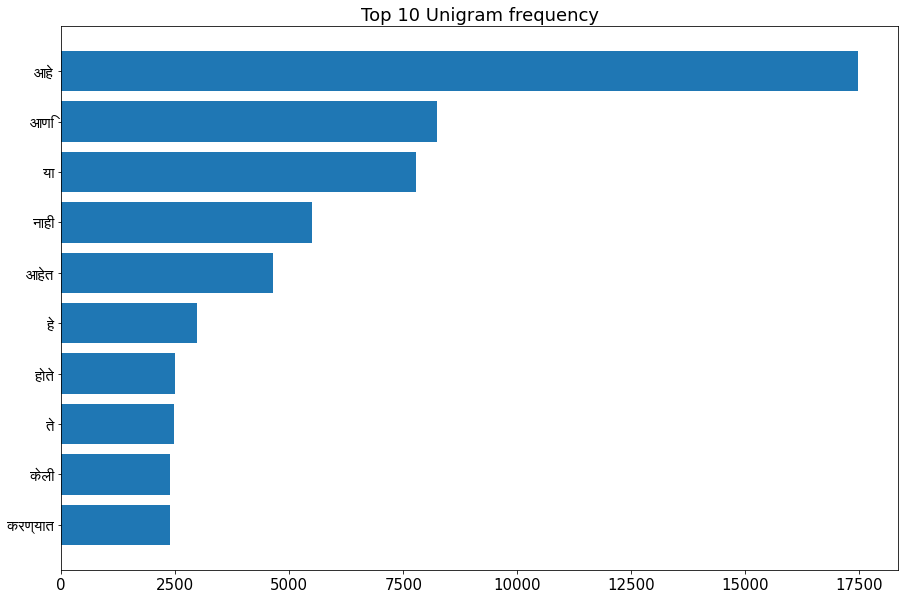

In [42]:
D = n_gram_freq_mar[1]
D = dict(sorted(D.items(), key=lambda item: item[1], reverse=True))
D = dict(itertools.islice(D.items(), 10))

plt.rcParams.update({'font.size': 15})
nirm = Path('NLP_Project/gargi.ttf')
hindi_font = FontProperties(fname=nirm)
plt.rcParams["figure.figsize"] = [15, 10]
height = list(D.values())
bars = list(D.keys())
y_pos = np.arange(len(bars))
plt.barh(y_pos, height)
plt.yticks(y_pos, bars, fontproperties=hindi_font)
plt.gca().invert_yaxis()
plt.title("Top 10 Unigram frequency") 
plt.show()

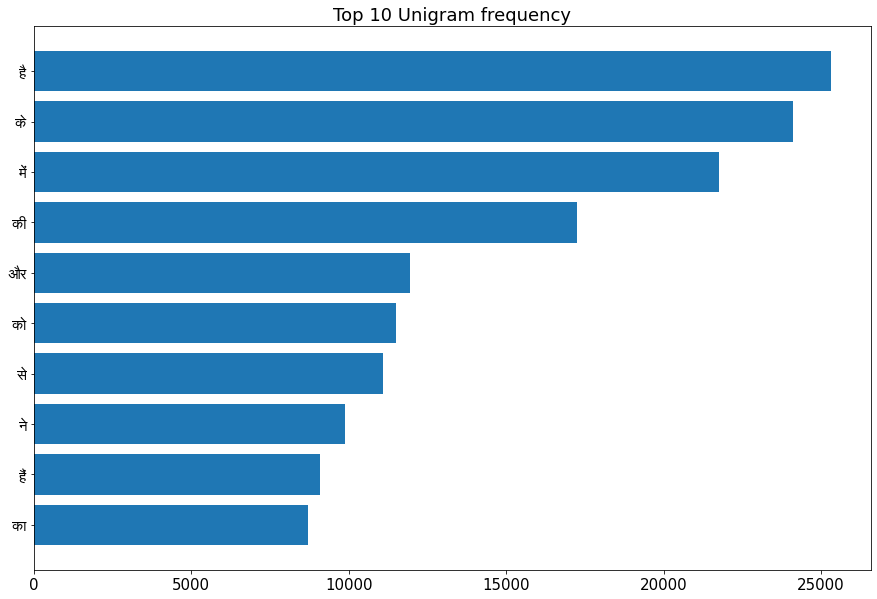

In [43]:
D = n_gram_freq_hin[1]
D = dict(sorted(D.items(), key=lambda item: item[1], reverse=True))
D = dict(itertools.islice(D.items(), 10))

plt.rcParams.update({'font.size': 15})
hindi_font = FontProperties(fname=nirm)
plt.rcParams["figure.figsize"] = [15, 10]
height = list(D.values())
bars = list(D.keys())
y_pos = np.arange(len(bars))
plt.barh(y_pos, height)
plt.yticks(y_pos, bars, fontproperties=hindi_font)
plt.gca().invert_yaxis()
plt.title("Top 10 Unigram frequency") 
plt.show()

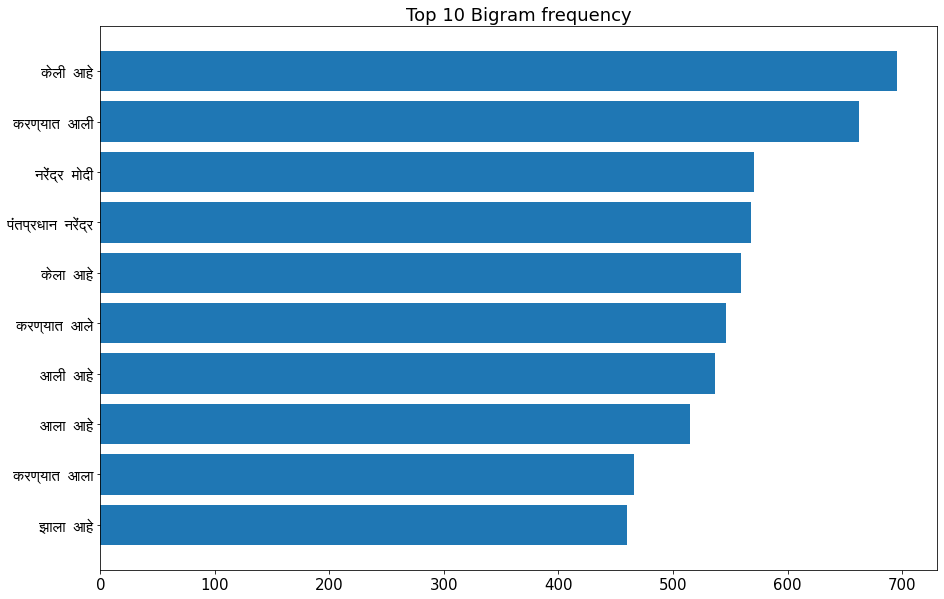

In [44]:
D = n_gram_freq_mar[2]
D = dict(sorted(D.items(), key=lambda item: item[1], reverse=True))
D = dict(itertools.islice(D.items(), 10))
hindi_font = FontProperties(fname=nirm)
height = list(D.values())
bars = list(D.keys())
y_pos = np.arange(len(bars))
plt.barh(y_pos, height)
plt.yticks(y_pos, bars, fontproperties=hindi_font)
plt.gca().invert_yaxis()
plt.title("Top 10 Bigram frequency") 
plt.show()

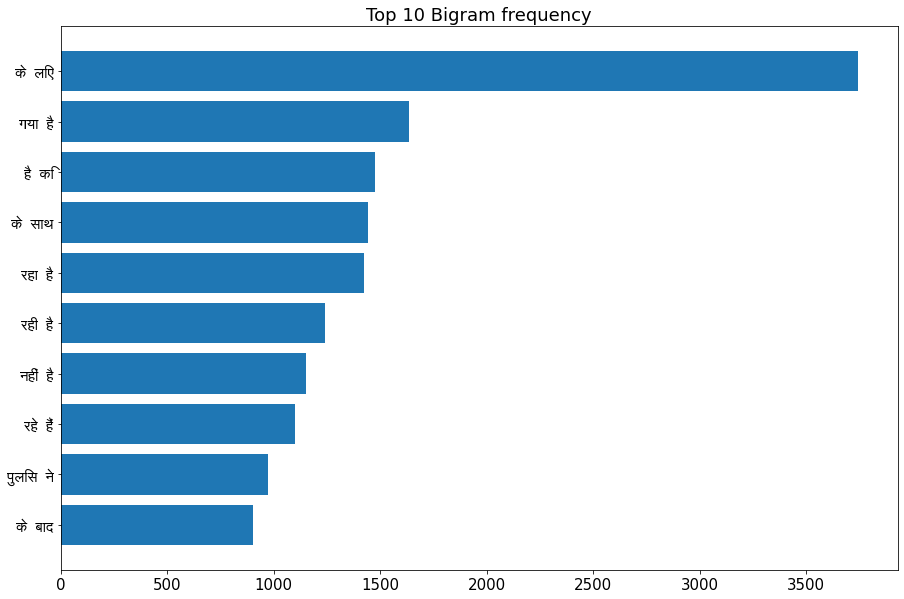

In [45]:
D = n_gram_freq_hin[2]
D = dict(sorted(D.items(), key=lambda item: item[1], reverse=True))
D = dict(itertools.islice(D.items(), 10))
hindi_font = FontProperties(fname=nirm)
height = list(D.values())
bars = list(D.keys())
y_pos = np.arange(len(bars))
plt.barh(y_pos, height)
plt.yticks(y_pos, bars, fontproperties=hindi_font)
plt.gca().invert_yaxis()
plt.title("Top 10 Bigram frequency") 
plt.show()

# Part of Speech Tagging

In [5]:
root_path = 'NLP_Project/data/'

In [6]:
import sys
import math
from decimal import *
import codecs

In [7]:
def parse_traindata(inpfile, outfile):
    fin = inpfile
    output_file = outfile
    wordtag_list = []
    try:
        input_file = codecs.open(fin, mode = 'r', encoding="utf-8")
        lines = input_file.readlines()
        for line in lines:
            line = line.strip('\n')
            data = line.split(" ")
            wordtag_list.append(data)

        input_file.close()
        return wordtag_list

    except IOError:
        fo = codecs.open(output_file,mode = 'w',encoding="utf-8")
        fo.write("File not found: {}".format(fin))
        fo.close()
        sys.exit()

In [8]:
def transition_count(train_data):
    global tag_list
    global word_set    
    transition_dict = {}
    global tag_count
    for value in train_data:
        previous = "start"
        for data in value:
            i = data[::-1]
            word = data[:-i.find("_") - 1]
            word_set.add(word.lower())
            data = data.split("_")
            tag = data[-1]
            tag_list.add(tag)
            if tag in tag_count:
                tag_count[tag] += 1
            else:
                tag_count[tag] = 1
            if (previous + "~tag~" + tag) in transition_dict:
                transition_dict[previous + "~tag~" + tag] += 1
                previous = tag
            else:
                transition_dict[previous + "~tag~" + tag] = 1
                previous = tag

    return transition_dict

In [9]:
def transition_probability(train_data):
    count_dict = transition_count(train_data)
    prob_dict = {}
    for key in count_dict:
        den = 0
        val = key.split("~tag~")[0]
        for key_2 in count_dict:
            if key_2.split("~tag~")[0] == val:
                den += count_dict[key_2]
        prob_dict[key] = Decimal(count_dict[key])/(den)
    return prob_dict

In [10]:
def transition_smoothing(train_data):
    transition_prob = transition_probability(train_data)
    for tag in tag_list:
        if "start" + tag not in  transition_prob:
            transition_prob[("start" + "~tag~" + tag)] = Decimal(1) / Decimal(len(word_set) + tag_count[tag])
    for tag1 in tag_list:
        for tag2 in tag_list:
            if (tag1 +"~tag~" + tag2) not in transition_prob:
                transition_prob[(tag1+"~tag~"+tag2)] = Decimal(1)/Decimal(len(word_set) + tag_count[tag1])
    return transition_prob

In [11]:
def emission_count(train_data):  
    count_word = {}
    for value in train_data:
        for data in value:
            i = data[::-1]
            word = data[:-i.find("_") - 1]
            tag = data.split("_")[-1]
            if word.lower() + "_" + tag in count_word:
                count_word[word.lower() + "_" + tag] +=1
            else:
                count_word[word.lower() + "_" + tag] = 1
    return count_word

In [12]:
def emission_probability(train_data):
    global tag_count
    word_count = emission_count(train_data)
    emission_prob_dict = {}
    for key in word_count:
        emission_prob_dict[key] = Decimal(word_count[key])/tag_count[key.split("_")[-1]]
    return emission_prob_dict

In [13]:
def parse_trainedModel(inpmodel, outfile):
    # fin = "NLP_Assign/detailedmodel.txt"
    fin = inpmodel
    # output_file = "NLP_Assign/testoutput.txt"
    output_file = outfile
    transition_prob = {}
    emission_prob = {}
    tag_list = []
    tag_count ={}
    global tag_set
    try:
        input_file = codecs.open(fin,mode ='r', encoding="utf-8")
        lines = input_file.readlines()
        flag = False
        for line in lines:
            line = line.strip('\n')
            if line != "Emission Model":
                i = line[::-1]
                key_insert = line[:-i.find(":")-1]
                value_insert = line.split(":")[-1]
                if flag == False:
                    transition_prob[key_insert] = value_insert
                    if (key_insert.split("~tag~")[0] not in tag_list) and (key_insert.split("~tag~")[0] != "start"):
                        tag_list.append(key_insert.split("~tag~")[0])
                else:
                    emission_prob[key_insert] = value_insert
                    val = key_insert.split("_")[-1]
                    j = key_insert[::-1]
                    word = key_insert[:-j.find("_")-1].lower()
                    word_set.add(word)
                    if val in tag_count:
                        tag_count[val] +=1
                    else:
                        tag_count[val] = 1
                    tag_set.add(val)

            else:
                flag = True
                continue

        input_file.close()
        return tag_list, transition_prob, emission_prob, tag_count, word_set

    except IOError:
        fo = codecs.open(output_file, mode='w',encoding="utf-8")
        fo.write("File not found: {}".format(fin))
        fo.close()
        sys.exit()

In [14]:
def viterbi_algorithm(a_line_sen, tag_list, transition_prob, emission_prob,tag_count, word_set):
    global tag_set
    # Get words from each a_line_sen #
    a_line_sen = a_line_sen.strip("\n")
    list_of_words = a_line_sen.split(" ")
    now_prob = {}
    for tag in tag_list:
        # transition probability #
        tp = Decimal(0)
        # Emission probability #
        em = Decimal(0)
        # Storing the probability of every tag to be starting tag #
        if "start~tag~"+tag in transition_prob:
            tp = Decimal(transition_prob["start~tag~"+tag])
        # Check for word in training data. If present, check the probability of the first word to be of given tag#
        if list_of_words[0].lower() in word_set:
            if (list_of_words[0].lower()+"_"+tag) in emission_prob:
                em = Decimal(emission_prob[list_of_words[0].lower()+"_"+tag])
                # Storing probability of current combination of tp and em #
                now_prob[tag] = tp * em
         # Check for word in training data. If absent then probability is just tp# 
        else:
            em = Decimal(1) /(tag_count[tag] +len(word_set))
            now_prob[tag] = tp

    if len(list_of_words) == 1:
        # Return max path if only one word in a_line_sen #
        max_path = max(now_prob, key=now_prob.get)
        return max_path
    else:
        # Tracking from second word to last word #
        for i in range(1, len(list_of_words)):
            last_prob = now_prob
            now_prob = {}
            locals()['dict{}'.format(i)] = {}
            previous_tag = ""
            for tag in tag_list:
                if list_of_words[i].lower() in word_set:
                    if list_of_words[i].lower()+"_"+tag in emission_prob:
                        em = Decimal(emission_prob[list_of_words[i].lower()+"_"+tag])
                        # Find the maximum probability using previous node's(tp*em)[i.e probability of reaching to the previous node] * tp * em (Bigram Model) #
                        max_prob, previous_state = max((Decimal(last_prob[previous_tag]) * Decimal(transition_prob[previous_tag + "~tag~" + tag]) * em, previous_tag) for previous_tag in last_prob)
                        now_prob[tag] = max_prob
                        locals()['dict{}'.format(i)][previous_state + "~" + tag] = max_prob
                        previous_tag = previous_state
                else:
                    em = Decimal(1) /(tag_count[tag] +len(word_set))
                    max_prob, previous_state = max((Decimal(last_prob[previous_tag]) * Decimal(transition_prob[previous_tag+"~tag~"+tag]) * em, previous_tag) for previous_tag in last_prob)
                    now_prob[tag] = max_prob
                    locals()['dict{}'.format(i)][previous_state + "~" + tag] = max_prob
                    previous_tag = previous_state

            # if last word of a_line_sen, then return path dicts of all words #
            if i == len(list_of_words)-1:
                max_path = ""
                last_tag = max(now_prob, key=now_prob.get)
                max_path = max_path + last_tag + " " + previous_tag
                for j in range(len(list_of_words)-1,0,-1):
                    for key in locals()['dict{}'.format(j)]:
                        data = key.split("~")
                        if data[-1] == previous_tag:
                            max_path = max_path + " " +data[0]
                            previous_tag = data[0]
                            break
                result = max_path.split()
                result.reverse()
                return " ".join(result)

Training model

In [15]:
tag_list = set()
tag_count = {}
word_set = set()

In [16]:
train_data = parse_traindata(root_path+'marathiposSentencewithtags.pos', root_path+'Models/marathiModel.ml')
transition_model = transition_smoothing(train_data)
emission_model = emission_probability(train_data)

fout = codecs.open(root_path+"Models/marathiModel.ml", mode ='w', encoding="utf-8")

for key, value in transition_model.items():
    fout.write('%s:%s\n' % (key, value))

fout.write(u'Emission Model\n')
for key, value in emission_model.items():
    fout.write('%s:%s\n' % (key, value))

POS tagger Model for marathi

In [17]:
inp = open(root_path + 'Models/marathiModel.ml', 'r')
print("Input : ")
print(inp.read())
inp.close()

Input : 
start~tag~SYM:0.0001419446415897799858055358410
SYM~tag~NN:0.2209523809523809523809523810
NN~tag~CC:0.02532588454376163873370577281
CC~tag~NN:0.2798634812286689419795221843
NN~tag~NN:0.2959031657355679702048417132
NN~tag~VM:0.3148975791433891992551210428
VM~tag~VAUX:0.3115540789959394610557401255
VAUX~tag~DEM:0.008973080757726819541375872383
DEM~tag~NN:0.8275862068965517241379310345
NN~tag~NNPC:0.04152700186219739292364990689
NNPC~tag~NNP:0.7114989733059548254620123203
NNP~tag~PRP:0.2103064066852367688022284123
PRP~tag~NNP:0.05806451612903225806451612903
NNP~tag~NN:0.2172701949860724233983286908
NN~tag~QO:0.004096834264432029795158286778
QO~tag~NN:0.546875
VM~tag~PUNC:0.08748615725359911406423034330
PUNC~tag~SYM:0.07092198581560283687943262411
SYM~tag~DEM:0.1009523809523809523809523810
NNPC~tag~NNPC:0.2854209445585215605749486653
PRP~tag~VM:0.1435483870967741935483870968
VM~tag~PUNC
:0.2321889996308600959763750461
start~tag~JJ:0.0001302592158395206460857105640
JJ~tag~NNPC:0.00

Testing

In [18]:
tag_set = set()
word_set = set()

In [21]:
arg1 = root_path+"Models/marathiModel.ml"
arg2  = root_path+"Models/Testing/mr_test_output.txt"
tag_list, transition_model, emission_model, tag_count, word_set = parse_trainedModel(arg1, arg2)
fin = root_path + "Models/Testing/mr_test_data.txt"
input_file = codecs.open(fin, mode='r', encoding="utf-8")
fout = codecs.open(root_path+"Models/Testing/mr_test_output.txt",mode='w', encoding="utf-8")
for sentence in input_file.readlines():
    path = viterbi_algorithm(sentence, tag_list, transition_model, emission_model,tag_count, word_set)
    sentence = sentence.strip("\n")
    word = sentence.split(" ")
    tag = path.split(" ")
    for j in range(0,len(word)):
        if j == len(word)-1:
            fout.write(word[j] + "_" + tag[j]+ u'\n')
        else:
            fout.write(word[j] + "_" + tag[j] + " ")
            

If you don't see any output in the following cell, re-run the above cell

In [22]:
inp = open(root_path + 'Models/Testing/mr_test_data.txt', 'r')
print("Input : ")
print(inp.read())
inp.close()
print("\n")

inp = open(root_path + 'Models/Testing/mr_test_output.txt', 'r')
print("Output : ")
print(inp.read())
inp.close()
print("\n")

inp = open(root_path + 'Models/Testing/mr_verify_op.txt', 'r')
print("Input : ")
print(inp.read())
inp.close()
print("\n")

Input : 
तो माझा मित्र आहे .
मात्र , त्यांना गती नसल्याचे आढळून आले आहे .
त्यामुळे योजनांच्या कामांची केंद्रीय नगरविकास खात्याचे अधिकारी पाहणी करणार आहेत .
या पार्श्‍वभूमीवर योजनांमध्ये बदल करण्याचा निर्णय घेण्यात आला आहे .
त्यात , महापालिकेच्या योजनांची अंमलबजावणी त्यांच्या पातळीवर होणार आहे , तर ‘ पीएमपी ’ने आखलेल्या तीन प्रकल्पांच्या अंमलबजावणीची जबाबदारी ‘ पीएमपी ’ कडेच असेल , असे सांगण्यात आले आहे .
प्रकल्पातील काही योजना वगळण्यात येणार असल्याने शिक्षण , आरोग्य , पर्यटन आणि पर्यावरणाचा योजनांमध्ये समावेश करण्यात येणार असल्याचे स्पष्ट करण्यात आले आहे .
जगताप म्हणाले , " या प्रकल्पातील काही योजनांचे स्वरूप बदलण्याचा प्रयत्न आहे .
त्यानुसार नव्या चार घटकांवर काम करण्यात येणार असून , त्याबाबत संचालक मंडळाच्या बैठकीत चर्चा करून निर्णय घेण्यात येतील .
त्या त्या यंत्रणांकडे योजना वर्ग केल्यानंतर त्यांच्या खर्चात कपात होणार आहे .
तो खर्च नव्या योजनांकरिता वापरण्यात येईल .
शिवाय शिक्षण , आरोग्य आणि पर्यावरण या क्षेत्रातील कामांसाठी नव्याने काही तरतूदही करण्याचे नियोजन आहे .
योजना निश्‍चित 

POS tagger Model Hindi

In [23]:
tag_list = set()
tag_count = {}
word_set = set()

In [24]:
train_data = parse_traindata(root_path+'hindiposSentencewithtags.pos', root_path+'Models/hindiModel.ml')
transition_model = transition_smoothing(train_data)
emission_model = emission_probability(train_data)

fout = codecs.open(root_path+"Models/hindiModel.ml", mode ='w', encoding="utf-8")

for key, value in transition_model.items():
    fout.write('%s:%s\n' % (key, value))

fout.write(u'Emission Model\n')
for key, value in emission_model.items():
    fout.write('%s:%s\n' % (key, value))

In [25]:
inp = open(root_path+'Models/hindiModel.ml', 'r')
print("Model : ")
print(inp.read())
inp.close()

Model : 
start~tag~JJ:0.0003951007506914263137099960490
JJ~tag~NN:0.6840579710144927536231884058
NN~tag~VFM:0.1192504258943781942078364566
VFM~tag~SYM:0.008230452674897119341563786008
SYM~tag~NNP
:0.07352941176470588235294117647
start~tag~NNC:0.0003979307600477516912057302029
NNC~tag~NN:0.6880733944954128440366972477
NN~tag~SYM
:0.0005678591709256104486087450312
start~tag~NNP:0.0003388681802778719078278549644
NNP~tag~PREP:0.7084967320261437908496732026
PREP~tag~NNC:0.03968668407310704960835509138
NN~tag~PREP:0.5672913117546848381601362862
PREP~tag~NNP:0.07101827676240208877284595300
PREP~tag~PRP:0.04647519582245430809399477807
PRP~tag~NN:0.4022038567493112947658402204
PREP~tag~NVB:0.06005221932114882506527415144
NVB~tag~VFM:0.6766467065868263473053892216
VFM~tag~VAUX:0.4334705075445816186556927298
VAUX~tag~PUNC:0.02312138728323699421965317919
PUNC~tag~PRP:0.1683168316831683168316831683
PRP~tag~NNP:0.03305785123966942148760330579
PREP~tag~NN:0.2605744125326370757180156658
PREP~tag~JJ:0.

In [26]:
tag_set = set()
word_set = set()

In [29]:
arg1 = root_path+"Models/hindiModel.ml"
arg2  = root_path+"Models/Testing/hi_test_output"
tag_list, transition_model, emission_model, tag_count, word_set = parse_trainedModel(arg1, arg2)
fin = root_path + "Models/Testing/hi_test_data.txt"
input_file = codecs.open(fin, mode='r', encoding="utf-8")
fout = codecs.open(root_path+"Models/Testing/hi_test_output.txt",mode='w', encoding="utf-8")
for sentence in input_file.readlines():
    path = viterbi_algorithm(sentence, tag_list, transition_model, emission_model,tag_count, word_set)
    sentence = sentence.strip("\n")
    word = sentence.split(" ")
    tag = path.split(" ")
    for j in range(0,len(word)):
        if j == len(word)-1:
            fout.write(word[j] + "_" + tag[j]+ u'\n')
        else:
            fout.write(word[j] + "_" + tag[j] + " ")


If you don't see any output of the cell below, re-run the above cell

In [30]:
inp = open(root_path+'Models/Testing/hi_test_data.txt', 'r')
print("Input : ")
print(inp.read())
inp.close()
print("\n")

inp = open(root_path+'Models/Testing/hi_test_output.txt', 'r')
print("Output : ")
print(inp.read())
inp.close()
print("\n")

inp = open(root_path+'Models/Testing/hi_verify_op.txt', 'r')
print("Output : ")
print(inp.read())
inp.close()

Input : 
तीन विकेट लेने वाले ऑफ स्पिनर सक लैन मुश्ताक को मैन ऑफ द मैच घोषित किया गया ।
न्यू जीलैंड की शुरुआत अच्छी नहीं रही जब उनके तीन बल्लेबाज फ्लेमिंग , टुज और एस्टल को टीम के १८ रन के योग पर ही पैवेलियन लौट जाना पड़ा ।
अकरम ने फ्लेमिंग को एक रन पर और एस्टल को दस रन पर बोल्ड किया ।
टुज को वकार यूनुस ने विकेट के पीछे मोइन खान के हाथों एक रन पर लपकवाया ।
लेकिन फिर विंसेट और मैकमिलन के बीच चौथे विकेट के लिए १०० रनों की भागीदारी हुई ।
विंसेट ने ६१ गेंदों में तीन चौकों की मदद से ४३ रनों की पारी खेली ।
उन्हें सकलैन ने मोइन के हाथों स्टम्प कराया ।
बहुतुले ने ५१ रनों की पारी खेली ।
आठवें विकेट के लिए दिघे और पवार ने मिलकर ६३ रन जोड़े ।
गिलक्रिस्ट द्वारा लपके जाने से पूर्व दिघे ने ८४ रनों की शानदार पारी खेली ।
पवार ने मैदान पर चौतरफा शॉट खेले ।
वे दसवेें विकेट के लिए कुलकर्णी के साथ ३२ रनों की भागीदारी कर चुके हैं ।
मैक्ग्रा की शुरुआती गेंदबाजी अच्छी रही , लेकिन फिर बाद में मुंबई के पुछल्ले बल्लेबाजों ने ऑस्ट्रेलिया के सभी गेंदबाजों को खासा परेशान किया ।


Output : 
तीन_QFNUM विकेट_NN लेने_VNN

Model Accuracy

Accuracy of Marathi POS tagger

In [31]:
predicted = codecs.open(root_path+"Models/Testing/mr_test_output.txt", mode ='r', encoding="utf-8")
expected = codecs.open(root_path+"Models/Testing/mr_verify_op.txt", mode ='r', encoding="utf-8")

mis = 0
total = 0
for line in predicted.readlines():
    ulist = line.split(" ")
    total += len(ulist)
    alist = expected.readline().split(" ")
    ran = len(alist) if len(ulist) > len(alist) else len(ulist)
    for i in range(ran):
        if(alist[i] != ulist[i]):
            mis = mis + 1

print("Wrong Predictions = ",mis)
print("Total Predictions = ",total)
if (total == 0):
  print("Total is 0. So we can't move ahead!")
  exit
print("Accuracy is = ",100 - (mis/total * 100),"%")

Wrong Predictions =  84
Total Predictions =  208
Accuracy is =  59.61538461538461 %


Accuracy of Hindi POS tagger

In [32]:
predicted = codecs.open(root_path+"Models/Testing/hi_test_output.txt", mode ='r', encoding="utf-8")
expected = codecs.open(root_path + "Models/Testing/hi_verify_op.txt", mode ='r', encoding="utf-8")

mis = 0
total = 0
for line in predicted.readlines():
    ulist = line.split(" ")
    total += len(ulist)
    alist = expected.readline().split(" ")
    ran = len(alist) if len(ulist) > len(alist) else len(ulist)
    for i in range(ran):
        if(alist[i] != ulist[i]):
            mis = mis + 1

print("Wrong Predictions = ",mis)
print("Total Predictions = ",total)
if (total == 0):
  print("Total is 0. So we can't move ahead!")
  exit
else:
  print("Accuracy is = ",100 - (mis/total * 100),"%")

Wrong Predictions =  95
Total Predictions =  220
Accuracy is =  56.81818181818182 %


# Seq2seq Model

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import string
from string import digits
import re
from sklearn.utils import shuffle
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Input, Dense,Embedding
from keras.models import Model,load_model
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import Tokenizer
from keras.models import model_from_json
import pickle as pkl
import numpy as np

In [3]:
language_data = pd.read_csv('NLP_Project/Marathi_Hindi.csv')

In [4]:
Marathi_text = language_data['Marathi'].values
Hindi_text = language_data['Hindi'].values

In [95]:
Marathi_text_ = [x.lower() for x in Marathi_text]
Hindi_text_ = [x.lower() for x in Hindi_text]

In [96]:
Marathi_text_ = [re.sub("'",'',x) for x in Marathi_text_]
Hindi_text_ = [re.sub("'",'',x) for x in Hindi_text_]
def remove_punc(text_list):
  table = str.maketrans('', '', string.punctuation)
  removed_punc_text = []
  for sent in text_list:
    sentance = [w.translate(table) for w in sent.split(' ')]
    removed_punc_text.append(' '.join(sentance))
  return removed_punc_text
Marathi_text_ = remove_punc(Marathi_text_)
Hindi_text_ = remove_punc(Hindi_text_)

# removing the digits from Hindi sentances
remove_digits = str.maketrans('', '', digits)
removed_digits_text = []
for sent in Marathi_text_:
  sentance = [w.translate(remove_digits) for w in sent.split(' ')]
  removed_digits_text.append(' '.join(sentance))
Marathi_text_ = removed_digits_text

# removing the digits from the marathi sentances
Hindi_text_ = [re.sub("[२३०८१५७९४६]","",x) for x in Hindi_text_]
Hindi_text_ = [re.sub("[\u200d]","",x) for x in Hindi_text_]

# removing the stating and ending whitespaces
Marathi_text_ = [x.strip() for x in Marathi_text_]
Hindi_text_ = [x.strip() for x in Hindi_text_]

# removing the starting and ending whitespaces
Marathi_text_ = [x.strip() for x in Marathi_text_]
Hindi_text_ = [x.strip() for x in Hindi_text_]

# Putting the start and end words in the marathi sentances
Hindi_text_ = ["start " + x + " end" for x in Hindi_text_]

# Hindi_text_
Hindi_text_[0], Marathi_text_[0]

('start जाना। end', 'जा')

In [97]:
X = Marathi_text_
Y = Hindi_text_

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.1)
len(X_train),len(y_train), len(X_test), len(y_test)

X[0], Y[0]

('जा', 'start जाना। end')

In [98]:
# preparing data for the word embedding
def Max_length(data):
  max_length_ = max([len(x.split(' ')) for x in data])
  return max_length_

#Training data
max_length_Hindi = Max_length(X_train)
max_lenght_marathi = Max_length(y_train)

#Test data
max_length_Hindi_test = Max_length(X_test)
max_lenght_marathi_test = Max_length(y_test)

max_lenght_marathi, max_length_Hindi

(16, 12)

In [99]:

def tokenizer_(text_data):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(text_data)
  return tokenizer

tokenizer_input = tokenizer_(X_train)
vocab_size_input = len(tokenizer_input.word_index) + 1
tokenizer_target = tokenizer_(y_train)
vocab_size_target = len(tokenizer_target.word_index) + 1

In [100]:
with open('tokenizer_input.pkl','wb') as f:
  pkl.dump(tokenizer_input,f)

with open('tokenizer_target.pkl','wb') as f:
  pkl.dump(tokenizer_target,f)
pkl.dump(tokenizer_input, open('tokenizer_input.pkl', 'wb'))
pkl.dump(tokenizer_target, open('tokenizer_target.pkl', 'wb'))

In [101]:
def generator_batch(X= X_train,Y=y_train, batch_size=128):
  while True:
    for j in range(0, len(X), batch_size):
      encoder_data_input = np.zeros((batch_size,max_length_Hindi),dtype='float32') #metrix of batch_size*max_length_Hindi
      decoder_data_input = np.zeros((batch_size,max_lenght_marathi),dtype='float32') #metrix of batch_size*max_length_marathi
      decoder_target_input = np.zeros((batch_size,max_lenght_marathi,vocab_size_target),dtype='float32') # 3d array one hot encoder decoder target data
      for i, (input_text,target_text) in enumerate(zip(X[j:j+batch_size],Y[j:j+batch_size])):
        for t, word in enumerate(input_text.split()):
          encoder_data_input[i,t] = tokenizer_input.word_index[word] # Here we are storing the encoder 
                                                                     #seq in row here padding is done automaticaly as 
                                                                     #we have defined col as max_lenght
        for t, word in enumerate(target_text.split()):
          # if word == 'START_':
          #   word = 'start'
          # elif word == 'END_':
          #   word = 'end'
          decoder_data_input[i,t] = tokenizer_target.word_index[word] # same for the decoder sequence
          if t>0:
            decoder_target_input[i,t-1,tokenizer_target.word_index[word]] = 1 #target is one timestep ahead of decoder input because it does not have 'start tag'
      # print(encoder_data_input.shape())
      yield ([encoder_data_input,decoder_data_input],decoder_target_input)


In [102]:
latent_dim = 50
# Define an input sequence and process it.
encoder_inputs = Input(shape=(None,),name="encoder_inputs")
emb_layer_encoder = Embedding(vocab_size_input,latent_dim, mask_zero=True)(encoder_inputs)
encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(emb_layer_encoder)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,),name="decoder_inputs")
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
emb_layer_decoder = Embedding(vocab_size_target,latent_dim, mask_zero=True)(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(emb_layer_decoder, initial_state=encoder_states)
decoder_dense = Dense(vocab_size_target, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)


In [103]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [104]:
train_samples = len(X_train)
val_samples = len(X_test)
batch_size = 128
epochs = 50

In [105]:
model.fit_generator(generator = generator_batch(X_train, y_train, batch_size = batch_size),
                    steps_per_epoch = train_samples//batch_size,
                    epochs=epochs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/50
271/271 [==============================] - 27s 63ms/step - loss: 2.3191 - accuracy: 0.1335
Epoch 2/50
271/271 [==============================] - 17s 63ms/step - loss: 1.9655 - accuracy: 0.1848
Epoch 3/50
271/271 [==============================] - 17s 63ms/step - loss: 1.8314 - accuracy: 0.2300
Epoch 4/50
271/271 [==============================] - 17s 63ms/step - loss: 1.7231 - accuracy: 0.2589
Epoch 5/50
271/271 [==============================] - 17s 63ms/step - loss: 1.6263 - accuracy: 0.2851
Epoch 6/50
271/271 [==============================] - 17s 63ms/step - loss: 1.5387 - accuracy: 0.3109
Epoch 7/50
271/271 [==============================] - 17s 63ms/step - loss: 1.4647 - accuracy: 0.3326
Epoch 8/50
271/271 [==============================] - 17s 63ms/step - loss: 1.3965 - accuracy: 0.3528
Epoch 9/50
271/271 [==============================] - 17s 63ms/step - loss: 1.3344 - accuracy: 0.3702
Epoch 10/50
271/271 [==============================] - 17s 63ms/step - loss: 1.281

In [106]:
model_json = model.to_json()
with open("model_2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_weight_5.h5")
print("Saved model to disk")

Saved model to disk


In [107]:

# loading the model architecture and asigning the weights
json_file = open('model_2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_loaded = model_from_json(loaded_model_json)
# load weights into new model
model_loaded.load_weights("model_weight_5.h5")

In [108]:
latent_dim = 50
#inference encoder
encoder_inputs_inf = model_loaded.input[0] #Trained encoder input layer
encoder_outputs_inf, inf_state_h, inf_state_c = model_loaded.layers[4].output # retoring the encoder lstm output and states
encoder_inf_states = [inf_state_h,inf_state_c]
encoder_model = Model(encoder_inputs_inf,encoder_inf_states)

In [109]:
#inference decoder
# The following tensor will store the state of the previous timestep in the "starting the encoder final time step"
decoder_state_h_input = Input(shape=(latent_dim,)) #becase during training we have set the lstm unit to be of 50
decoder_state_c_input = Input(shape=(latent_dim,))
decoder_state_input = [decoder_state_h_input,decoder_state_c_input]

# # inference decoder input
decoder_input_inf = model_loaded.input[1] #Trained decoder input layer
# decoder_input_inf._name='decoder_input'
decoder_emb_inf = model_loaded.layers[3](decoder_input_inf)
decoder_lstm_inf = model_loaded.layers[5]
decoder_output_inf, decoder_state_h_inf, decoder_state_c_inf = decoder_lstm_inf(decoder_emb_inf, initial_state =decoder_state_input)
decoder_state_inf = [decoder_state_h_inf,decoder_state_c_inf]
#inference dense layer
dense_inf = model_loaded.layers[6]
decoder_output_final = dense_inf(decoder_output_inf)# A dense softmax layer to generate prob dist. over the target vocabulary

decoder_model = Model([decoder_input_inf]+decoder_state_input,[decoder_output_final]+decoder_state_inf)



In [110]:
with open('tokenizer_input.pkl','rb') as f:
  tokenizer_input = pkl.load(f)
with open('tokenizer_target.pkl','rb') as f:
  tokenizer_target = pkl.load(f)
# Creating the reverse mapping to get the word from the index in the sequence
reverse_word_map_input = dict(map(reversed, tokenizer_input.word_index.items()))
reverse_word_map_target = dict(map(reversed, tokenizer_target.word_index.items()))

In [111]:
# Code to predct the input sentences translation
def decode_seq(input_seq):
  # print("input_seq=>",input_seq)
  state_values_encoder = encoder_model.predict(input_seq)
  # intialize the target seq with start tag
  target_seq = np.zeros((1,1))
  target_seq[0, 0] = tokenizer_target.word_index['start']
  # print("target_seq:=>",target_seq)
  stop_condition = False
  decoder_sentance = ''
  # print("Beforee the while loop")
  while not stop_condition:
    sample_word , decoder_h,decoder_c= decoder_model.predict([target_seq] + state_values_encoder)
    # print("sample_word: =>",sample_word)
    sample_word_index = np.argmax(sample_word[0,-1,:])
    # print("sample_word_index: ",sample_word_index)
    decoder_word = reverse_word_map_target[sample_word_index]
    decoder_sentance += ' '+ decoder_word
    # print("decoded word:=>",decoder_word)
    # print(len(decoder_sentance))
    # print("len(decoder_sentance) > 70: ",len(decoder_sentance) > 70)
    # print('decoder_word == "end"',decoder_word == 'end')
    # print(decoder_word == 'end' or len(decoder_sentance) > 70)
    # stop condition for the while loop
    if (decoder_word == 'end' or 
        len(decoder_sentance) > 70):
        stop_condition = True
        # print("from if condition")
    # target_seq = np.zeros((1,1))
    target_seq[0, 0] = sample_word_index
    # print(target_seq)
    state_values_encoder = [decoder_h,decoder_c]
  return decoder_sentance


In [112]:
for i in range(10):
  sentance = X_test[i]
  original_target = y_test[i]
  input_seq = tokenizer_input.texts_to_sequences([sentance])
  pad_sequence = pad_sequences(input_seq, maxlen= 30, padding='post')
  # print('input_sequence =>',input_seq)
  # print("pad_seq=>",pad_sequence)
  predicted_target = decode_seq(pad_sequence)
  print("Test sentance: ",i+1)
  print("sentance: ",sentance)
  print("origianl translate:",original_target[6:-4])
  print("predicted Translate:",predicted_target[:-4])
  print("=="*50)


Test sentance:  1
sentance:  तुमच्या ताटात काय आहे
origianl translate: आपकी प्लेट पर क्या है
predicted Translate:  आपका क्या है
Test sentance:  2
sentance:  तेल पाण्याबरोबर मिसळत नाही
origianl translate: तेल पानी के साथ मिश्रण नहीं करता है।
predicted Translate:  सूप को नहीं बेचता है।
Test sentance:  3
sentance:  टॉम मेरीशी नेहमीच फ्लर्ट करत असतो
origianl translate: टॉम हमेशा मैरी के साथ छेड़खानी कर रहा है।
predicted Translate:  टॉम ने मैरी से खेलने के लिए जवाब दिया।
Test sentance:  4
sentance:  मला आठवायचं नाहीये
origianl translate: मैं याद नहीं करना चाहता।
predicted Translate:  मैं नहीं देखता।
Test sentance:  5
sentance:  ते मला शांततेत बघत राहिले
origianl translate: उन्होंने मुझे मौन में देखा।
predicted Translate:  उन्हें देख रहे थे।
Test sentance:  6
sentance:  टॉमला मासे खायला आवडत नाहीत
origianl translate: टॉम मछली खाने को पसंद नहीं करता है।
predicted Translate:  टॉम मछली को बुला सकता हूं।
Test sentance:  7
sentance:  तू गेलीस तर त्याही जातील
origianl translate: यदि आप जाते हैं
pr